In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import os
import numpy as np

## LSM

In [2]:
start_scope()

def run_lsm(signal_in, plot=False):
    tau = 10*ms

    s0 = TimedArray(signal_in[:,0]*150 ,dt=10*ms)
    s1 = TimedArray(signal_in[:,1]*150 ,dt=10*ms)
    s2 = TimedArray(signal_in[:,2]*150 ,dt=10*ms)
    s3 = TimedArray(signal_in[:,3]*150 ,dt=10*ms)
    s4 = TimedArray(signal_in[:,4]*150 ,dt=10*ms)
    s5 = TimedArray(signal_in[:,5]*150 ,dt=10*ms)
    s6 = TimedArray(signal_in[:,6]*150 ,dt=10*ms)
    s7 = TimedArray(signal_in[:,7]*150 ,dt=10*ms)
    s8 = TimedArray(signal_in[:,8]*150 ,dt=10*ms)
    s9 = TimedArray(signal_in[:,9]*150 ,dt=10*ms)
    s10 = TimedArray(signal_in[:,10]*150 ,dt=10*ms)
    s11 = TimedArray(signal_in[:,11]*150 ,dt=10*ms)
    s12 = TimedArray(signal_in[:,12]*150 ,dt=10*ms)
    s13 = TimedArray(signal_in[:,13]*150 ,dt=10*ms)
    s14 = TimedArray(signal_in[:,14]*150 ,dt=10*ms)
    s15 = TimedArray(signal_in[:,15]*150 ,dt=10*ms)
    s16 = TimedArray(signal_in[:,16]*150 ,dt=10*ms)
    Gin0 = NeuronGroup(1, 'du/dt = (-u + s0(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin1 = NeuronGroup(1, 'du/dt = (-u + s1(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin2 = NeuronGroup(1, 'du/dt = (-u + s2(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin3 = NeuronGroup(1, 'du/dt = (-u + s3(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin4 = NeuronGroup(1, 'du/dt = (-u + s4(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin5 = NeuronGroup(1, 'du/dt = (-u + s5(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin6 = NeuronGroup(1, 'du/dt = (-u + s6(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin7 = NeuronGroup(1, 'du/dt = (-u + s7(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin8 = NeuronGroup(1, 'du/dt = (-u + s8(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin9 = NeuronGroup(1, 'du/dt = (-u + s9(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin10 = NeuronGroup(1, 'du/dt = (-u + s10(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin11 = NeuronGroup(1, 'du/dt = (-u + s11(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin12 = NeuronGroup(1, 'du/dt = (-u + s12(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin13 = NeuronGroup(1, 'du/dt = (-u + s13(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin14 = NeuronGroup(1, 'du/dt = (-u + s14(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin15 = NeuronGroup(1, 'du/dt = (-u + s15(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')
    Gin16 = NeuronGroup(1, 'du/dt = (-u + s16(t))/(8*ms) : 1', threshold='u>100', reset='u=0', method='exact')


    # -----------------------------------------------------------------------------
    # Sets up a liquid state model to to analyze difference in incomming signals
    # 
    # -----------------------------------------------------------------------------

    ################################################################################
    # Model parameters
    ################################################################################
    ### General parameters
    duration = 0.51*second  # Total simulation time
    sim_dt = 0.1*ms        # Integrator/sampling step
    N_e = 800              # Number of excitatory neurons
    N_i = 200              # Number of inhibitory neurons

    ### Metrics to establish connections
    size = 3.75*mmeter
    distance = 50*umeter

    ### Neuron parameters
    E_l = -60*mV           # Leak reversal potential
    g_l = 9.99*nS          # Leak conductance
    E_e = 0*mV             # Excitatory synaptic reversal potential
    E_i = -80*mV           # Inhibitory synaptic reversal potential
    C_m = 198*pF           # Membrane capacitance
    tau_e = 5*ms           # Excitatory synaptic time constant
    tau_i = 10*ms          # Inhibitory synaptic time constant
    tau_r = 5*ms           # Refractory period
    I_ex = 150*pA          # External current
    V_th = -50*mV          # Firing threshold
    V_r = E_l              # Reset potential

    ### Synapse parameters
    w_e = 0.05*nS          # Excitatory synaptic conductance
    w_i = 1.0*nS           # Inhibitory synaptic conductance
    U_0 = 0.6              # Synaptic release probability at rest
    Omega_d = 2.0/second   # Synaptic depression rate
    Omega_f = 3.33/second  # Synaptic facilitation rate

    ################################################################################
    # Model definition
    ################################################################################
    # Set the integration time (in this case not strictly necessary, since we are
    # using the default value)
    defaultclock.dt = sim_dt

    ### Neurons
    neuron_eqs = '''
    dv/dt = (g_l*(E_l-v) + g_e*(E_e-v) + g_i*(E_i-v)
            )/C_m    : volt (unless refractory)
    dg_e/dt = -g_e/tau_e  : siemens  # post-synaptic exc. conductance
    dg_i/dt = -g_i/tau_i  : siemens  # post-synaptic inh. conductance
    x : meter (constant)
    y : meter (constant)
    z : meter (constant)
    '''
    neurons = NeuronGroup(N_e + N_i, model=neuron_eqs,
                          threshold='v>V_th', reset='v=V_r',
                          refractory='tau_r', method='euler')
    # Random initial membrane potential values and conductances
    neurons.v = 'E_l + rand()*(V_th-E_l)'
    neurons.g_e = 'rand()*w_e'
    neurons.g_i = 'rand()*w_i'
    exc_neurons = neurons[:N_e]
    inh_neurons = neurons[N_e:]

    # Arrange neurons on grid
    N_e_rows = int(sqrt(N_e))
    N_e_cols = N_e//N_e_rows
    grid_e_dist = (size/N_e_cols)
    exc_neurons.z = '(i//(N_e_rows*N_e_cols))*grid_e_dist - N_e_rows/2.0*grid_e_dist' 
    exc_neurons.y = '(i//(N_e_rows) - N_e_rows*i//(N_e_rows*N_e_cols))*grid_e_dist - N_e_rows/2.0*grid_e_dist'
    exc_neurons.x = '(i%N_e_rows)*grid_e_dist'

    N_i_rows = int(sqrt(N_i))
    N_i_cols = N_i//N_i_rows
    grid_i_dist = (size/N_i_cols)
    exc_neurons.z = '(i//(N_i_rows*N_i_cols))*grid_i_dist - N_i_rows/2.0*grid_i_dist' 
    exc_neurons.y = '(i//(N_i_rows) - N_i_rows*i//(N_i_rows*N_i_cols))*grid_i_dist - N_i_rows/2.0*grid_i_dist'
    exc_neurons.x = '(i%N_i_rows)*grid_i_dist'

    # Connect input to liquid
    #S_in = Synapses(G_in, neurons, 'w : 1', on_pre='v += 10*mV')
    #S_in.connect(i=inputarray, j=rand40) # Randomly connects input to liquid
    #S_in.w[:,:] = '1'
    S0 = Synapses(Gin0, neurons, on_pre='v_post += 20*mV')
    S0.connect(i=0, j=695)
    S1 = Synapses(Gin1, neurons, on_pre='v_post += 20*mV')
    S1.connect(i=0, j=773)
    S2 = Synapses(Gin2, neurons, on_pre='v_post += 20*mV')
    S2.connect(i=0, j=24)
    S3 = Synapses(Gin3, neurons, on_pre='v_post += 20*mV')
    S3.connect(i=0, j=651)
    S4 = Synapses(Gin4, neurons, on_pre='v_post += 20*mV')
    S4.connect(i=0, j=474)
    S5 = Synapses(Gin5, neurons, on_pre='v_post += 20*mV')
    S5.connect(i=0, j=60)
    S6 = Synapses(Gin6, neurons, on_pre='v_post += 20*mV')
    S6.connect(i=0, j=301)
    S7 = Synapses(Gin7, neurons, on_pre='v_post += 20*mV')
    S7.connect(i=0, j=380)
    S8 = Synapses(Gin8, neurons, on_pre='v_post += 20*mV')
    S8.connect(i=0, j=333)
    S9 = Synapses(Gin9, neurons, on_pre='v_post += 20*mV')
    S9.connect(i=0, j=148)
    S10 = Synapses(Gin10, neurons, on_pre='v_post += 20*mV')
    S10.connect(i=0, j=962)
    S11 = Synapses(Gin11, neurons, on_pre='v_post += 20*mV')
    S11.connect(i=0, j=680)
    S12 = Synapses(Gin12, neurons, on_pre='v_post += 20*mV')
    S12.connect(i=0, j=292)
    S13 = Synapses(Gin13, neurons, on_pre='v_post += 20*mV')
    S13.connect(i=0, j=252)
    S14 = Synapses(Gin14, neurons, on_pre='v_post += 20*mV')
    S14.connect(i=0, j=68)
    S15 = Synapses(Gin15, neurons, on_pre='v_post += 20*mV')
    S15.connect(i=0, j=116)
    S16 = Synapses(Gin16, neurons, on_pre='v_post += 20*mV')
    S16.connect(i=0, j=631)

    ### Synapses
    synapses_eqs = '''
    # Usage of releasable neurotransmitter per single action potential:
    du_S/dt = -Omega_f * u_S     : 1 (event-driven)
    # Fraction of synaptic neurotransmitter resources available:
    dx_S/dt = Omega_d *(1 - x_S) : 1 (event-driven)
    '''
    synapses_action = '''
    u_S += U_0 * (1 - u_S)
    r_S = u_S * x_S
    x_S -= r_S
    '''
    exc_syn_to_exc_syn = Synapses(exc_neurons, exc_neurons, model=synapses_eqs,
                       on_pre=synapses_action+'g_e_post += w_e*r_S')
    exc_syn_to_inh_syn = Synapses(exc_neurons, inh_neurons, model=synapses_eqs,
                       on_pre=synapses_action+'g_e_post += w_e*r_S')
    inh_syn_to_exc_syn = Synapses(inh_neurons, exc_neurons, model=synapses_eqs,
                       on_pre=synapses_action+'g_e_post += w_e*r_S')
    inh_syn_to_inh_syn = Synapses(inh_neurons, inh_neurons, model=synapses_eqs,
                       on_pre=synapses_action+'g_i_post += w_i*r_S')

    # Connect neurons within liquid
    exc_syn_to_exc_syn.connect(p='0.3*exp(-((x_pre - x_post)**2 + (y_pre - y_post)**2 + (z_pre - z_post)**2)/4.0)')
    exc_syn_to_inh_syn.connect(p='0.2*exp(-((x_pre - x_post)**2 + (y_pre - y_post)**2 + (z_pre - z_post)**2)/4.0)')
    inh_syn_to_exc_syn.connect(p='0.4*exp(-((x_pre - x_post)**2 + (y_pre - y_post)**2 + (z_pre - z_post)**2)/4.0)')
    inh_syn_to_inh_syn.connect(p='0.1*exp(-((x_pre - x_post)**2 + (y_pre - y_post)**2 + (z_pre - z_post)**2)/4.0)')
    # Start from "resting" condition: all synapses have fully-replenished
    # neurotransmitter resources
    exc_syn_to_exc_syn.x_S = 1
    exc_syn_to_inh_syn.x_S = 1
    inh_syn_to_exc_syn.x_S = 1
    inh_syn_to_inh_syn.x_S = 1

    # ##############################################################################
    # # Monitors
    # ##############################################################################
    # Note that we could use a single monitor for all neurons instead, but in this
    # way plotting is a bit easier in the end
    exc_mon = SpikeMonitor(exc_neurons)
    inh_mon = SpikeMonitor(inh_neurons)
    
   

    # ##############################################################################
    # # Simulation run
    # ##############################################################################
    run(duration, report='text')
    if plot is True:
        plt.subplot(2,1,1)
        plt.plot(inh_mon.t/ms, inh_mon.i,'.r')
        plt.subplot(2,1,2)
        plt.plot(exc_mon.t/ms, exc_mon.i,'.k')
        plt.show()
        
    return exc_mon, inh_mon

## Functions for converting lsm output to time series

In [3]:
def get_list_of_ts(input_ar):
    results = []
    
    # need to change back to full input_ar
    for points in input_ar:
        exc_mon, inh_mon = run_lsm(points)
        results.append((exc_mon, inh_mon))
    return results

def convert_output_to_ar(ar):
    results = [] 
    for i,v in enumerate(ar):
        results.append((np.array(v[0].t/ms), np.array(v[0].i) , np.array(v[1].t/ms), np.array(v[1].i)))
    return np.asarray(results)

def convert_to_std_ts(lstm_output, max_pos_time, window):
    ts = np.zeros((int(max_pos_time//window) + 1))
    exh_tms, exh_i = lstm_output[0], lstm_output[1]
    inh_tms, inh_i = lstm_output[2], lstm_output[3]
    for i in range(len(exh_tms)):
        time = list(exh_tms)[i]
        value = exh_i[i]
        rounded_time = int(time//window)
        ts[rounded_time] += float(value)
    
    for i in range(len(inh_tms)):
        time = list(inh_tms)[i]
        value = inh_i[i]
        rounded_time = int(time//window)
        ts[rounded_time] -= float(value) 
    
    return (ts - np.mean(ts))/np.std(ts) * (ts != 0)

## Specify Input file here

In [ ]:
#input file needs to be a in anarray of 51 by 17 numpy arrays
input_file_name = "2_d_new_blood_vessel_pnts.npy"
input_ar = np.load(input_file_name)
ts_ar = get_list_of_ts(input_ar)

WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_244", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_244", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_246", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_246", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_248", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_248", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_250", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_250", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_252", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_252", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_254", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_254", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_256", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_256", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_258", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_258", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_260", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_260", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_262", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_262", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_264", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_264", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 5s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_266", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_266", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_268", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_268", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_270", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_270", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_272", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_272", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_274", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_274", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_276", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_276", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_278", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_278", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_280", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_280", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_282", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_282", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_284", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_284", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_286", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_286", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_288", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_288", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_290", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_290", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_292", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_292", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_294", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_294", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_296", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_296", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_298", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_298", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_300", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_300", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_302", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_302", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_17_subgroup_304", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


WARNING    "i" is an internal variable of group "neurongroup_35_subgroup_304", but also exists in the run namespace with the value 243. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 0.51 s
0.51 (100%) simulated in 4s


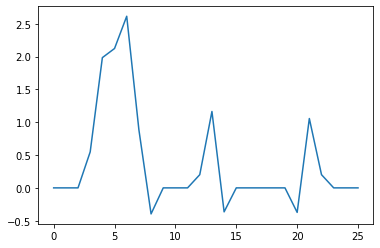

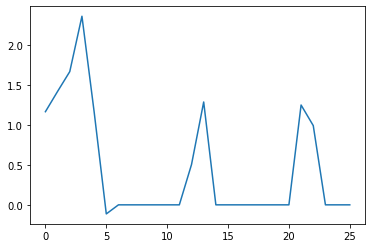

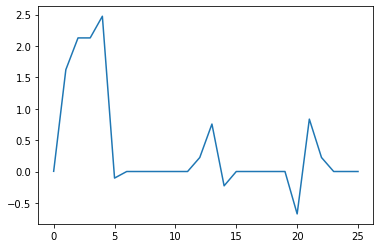

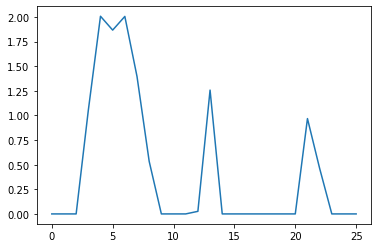

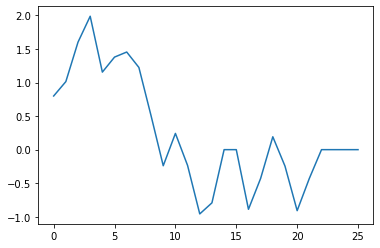

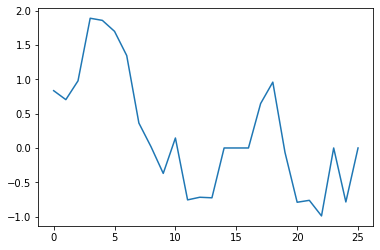

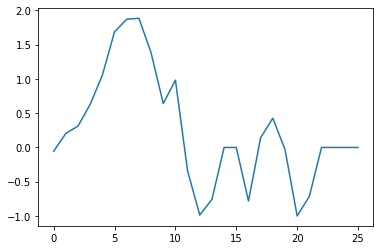

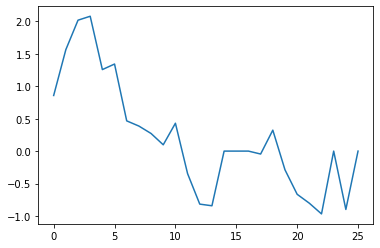

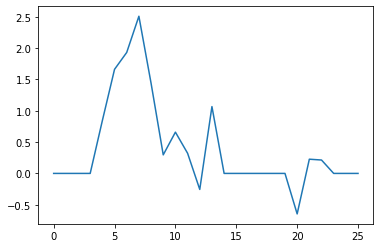

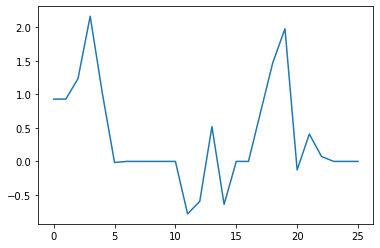

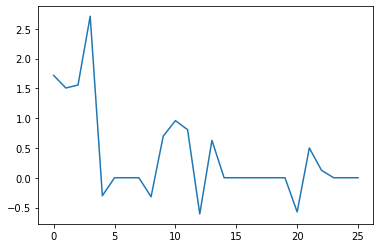

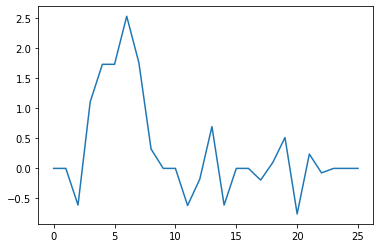

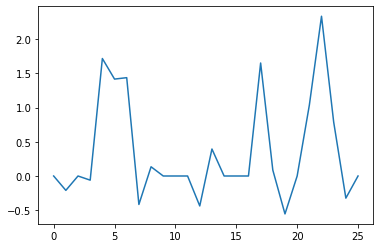

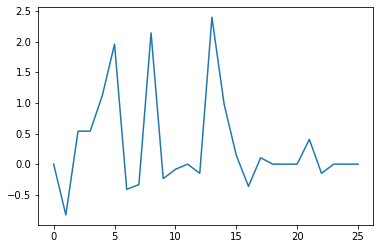

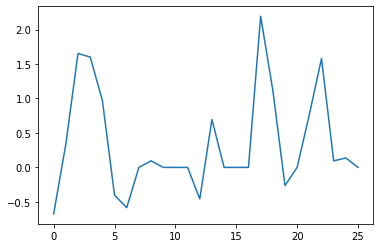

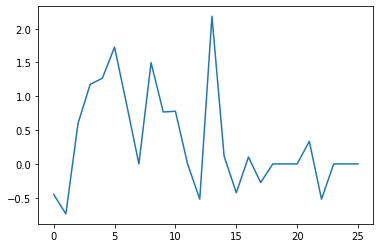

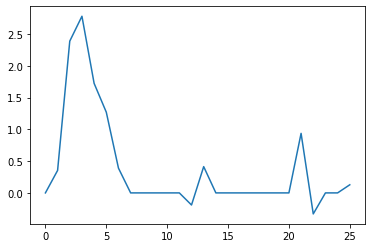

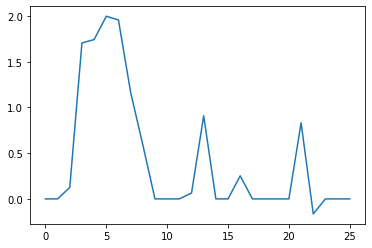

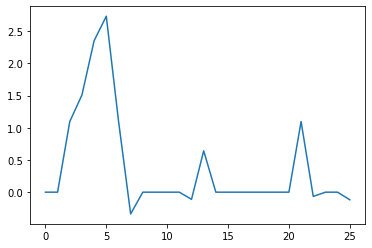

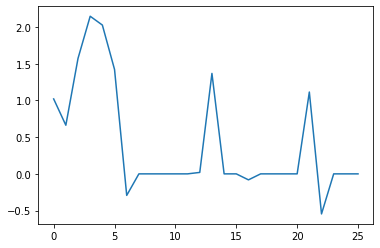

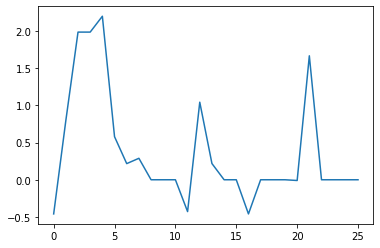

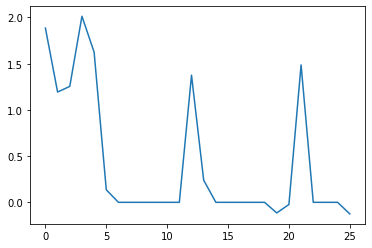

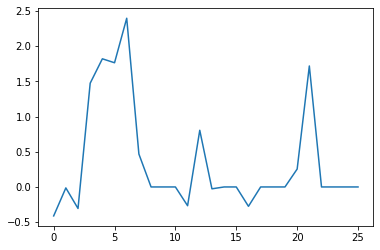

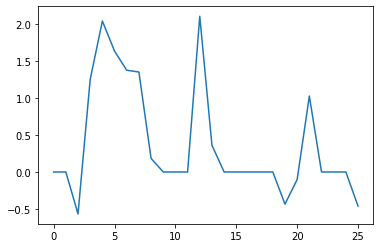

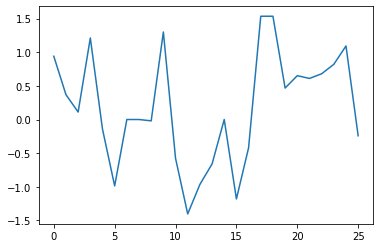

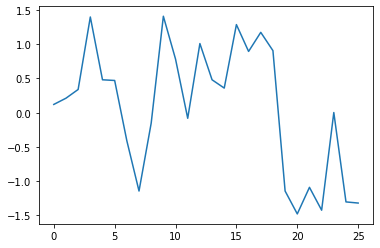

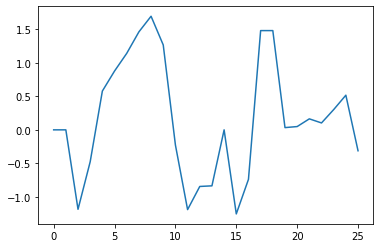

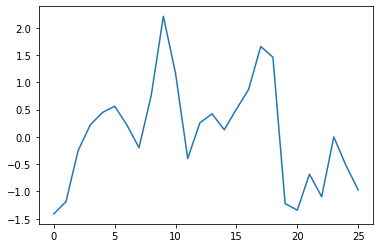

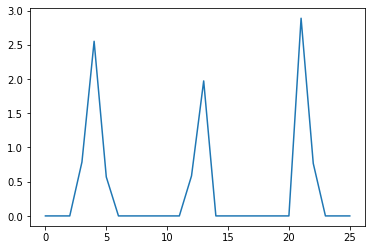

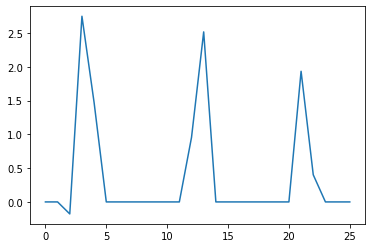

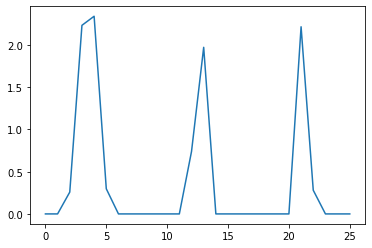

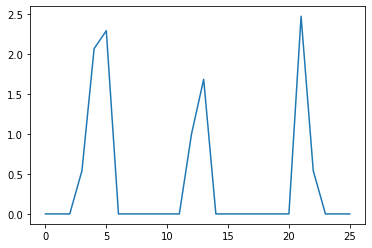

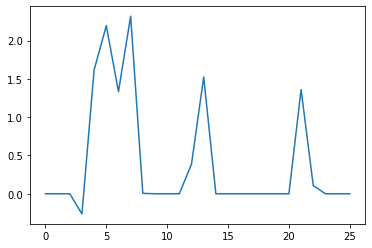

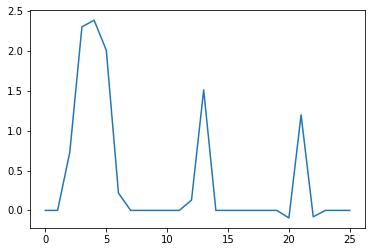

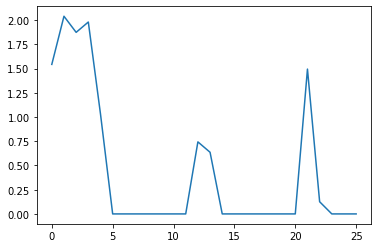

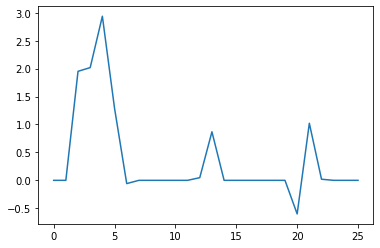

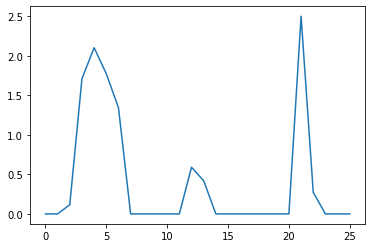

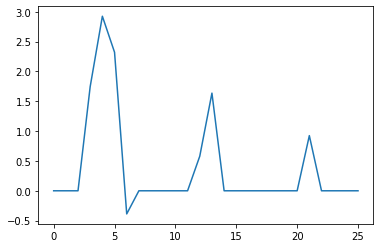

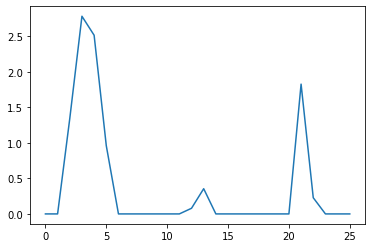

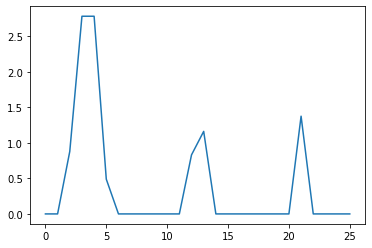

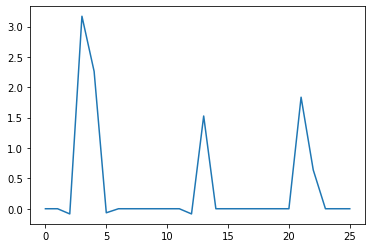

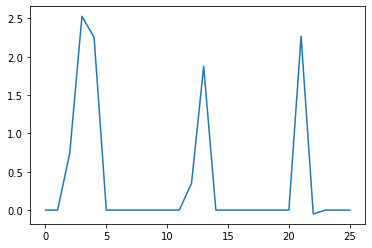

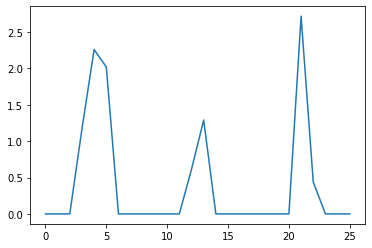

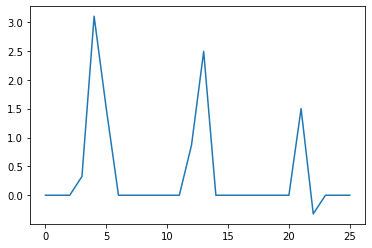

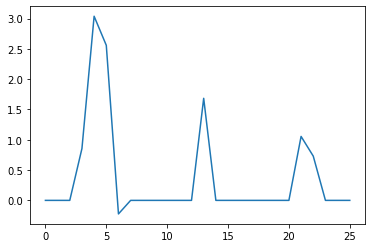

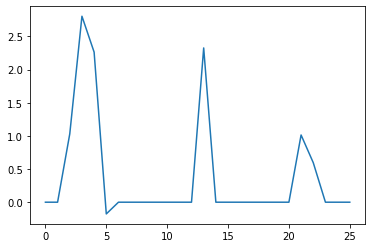

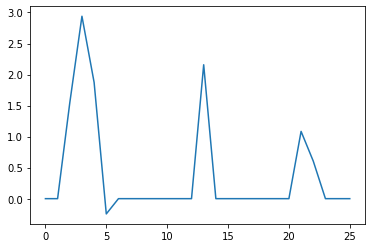

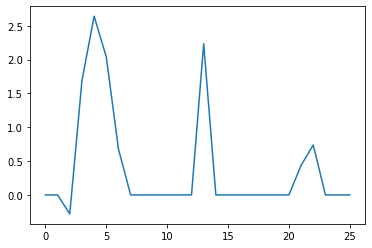

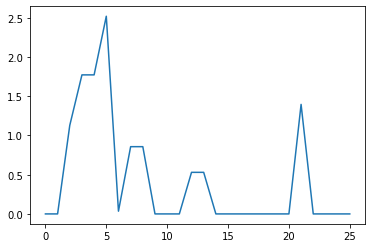

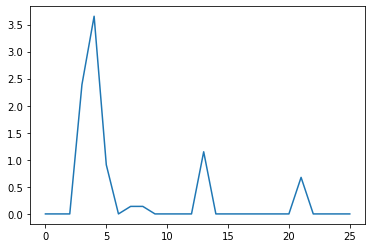

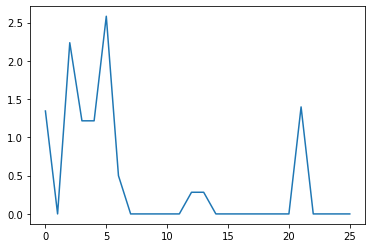

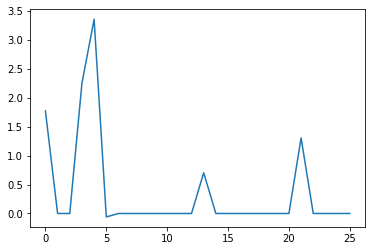

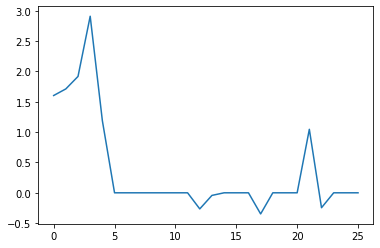

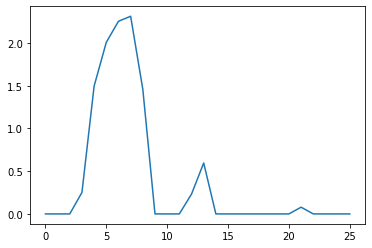

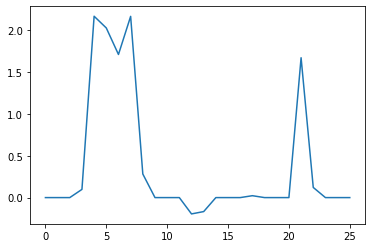

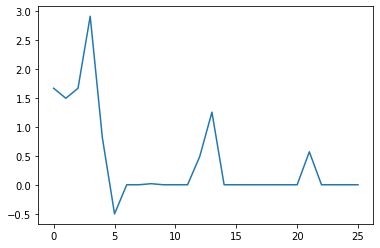

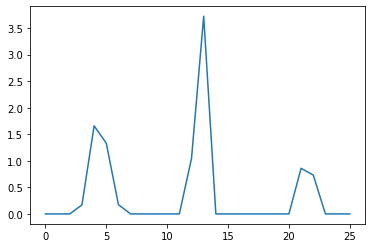

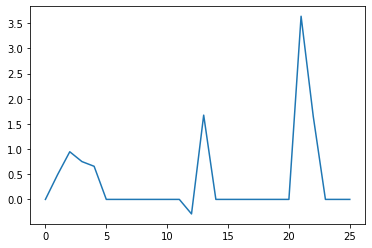

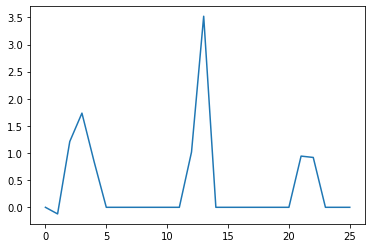

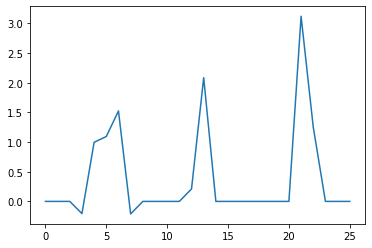

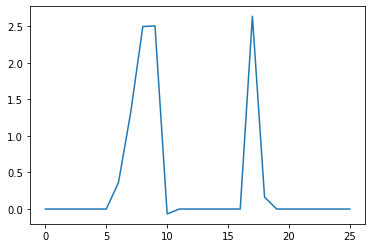

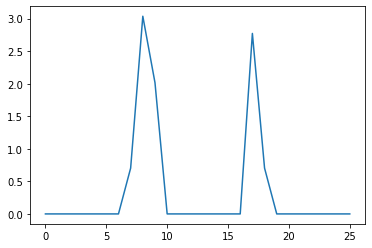

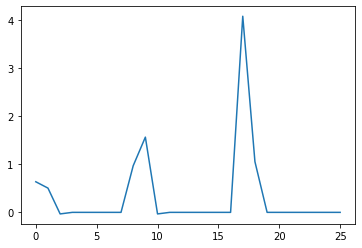

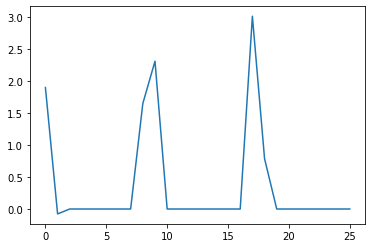

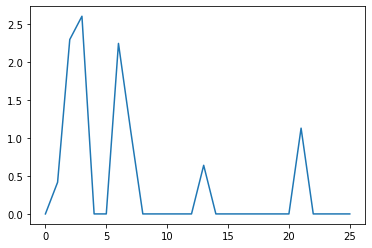

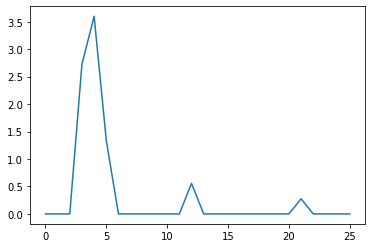

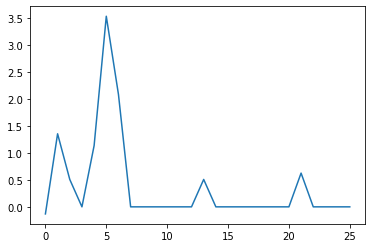

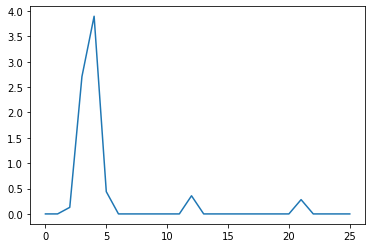

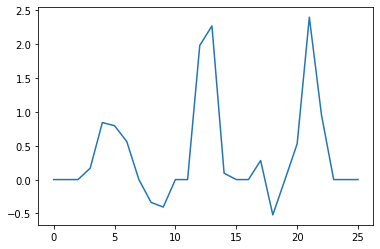

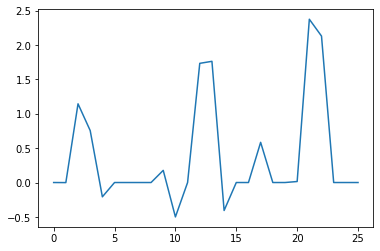

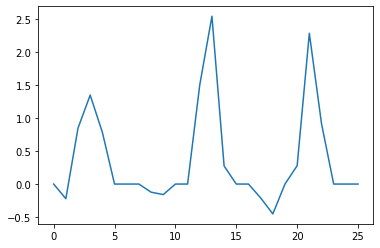

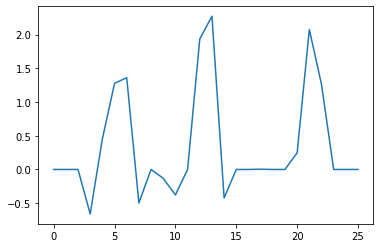

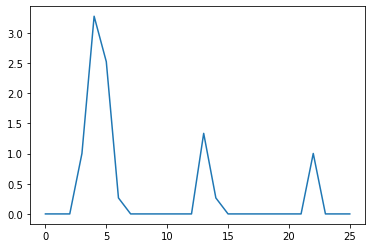

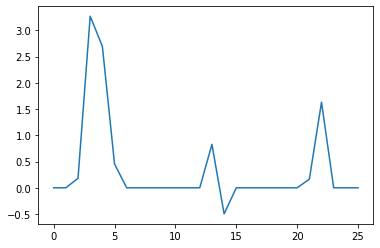

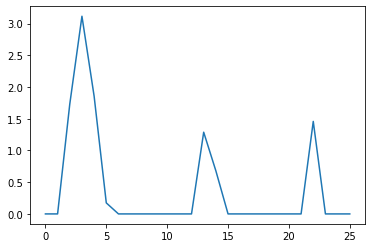

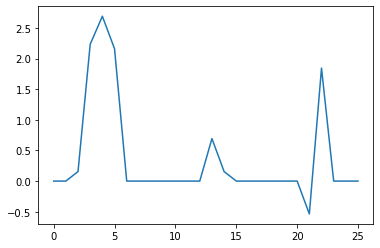

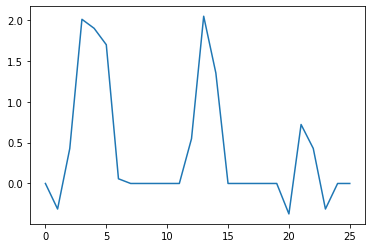

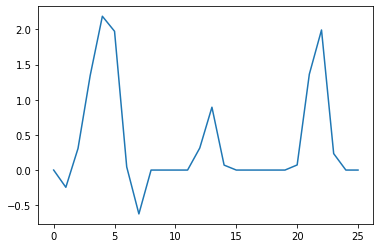

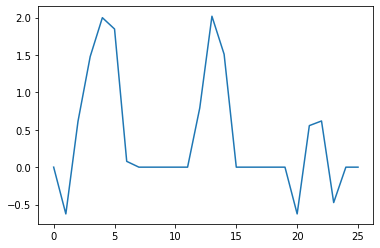

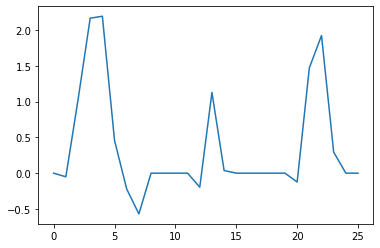

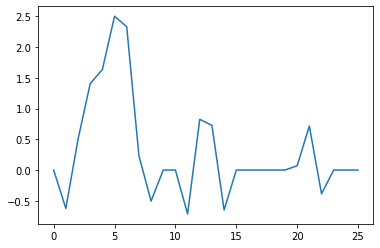

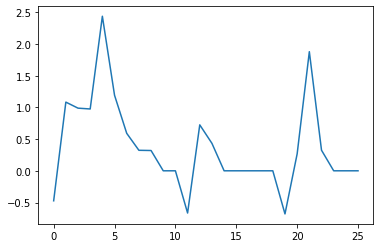

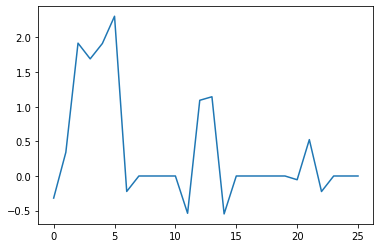

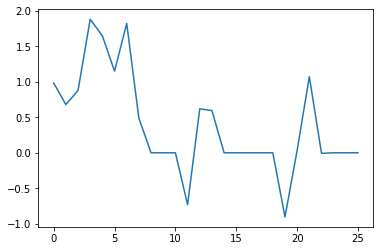

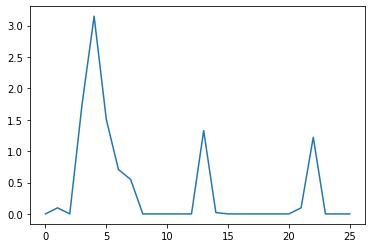

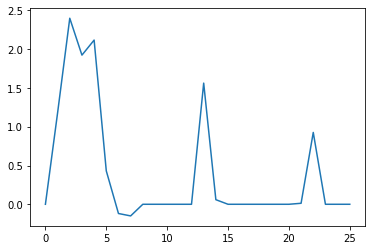

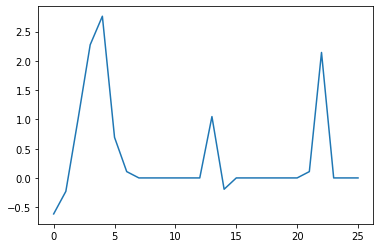

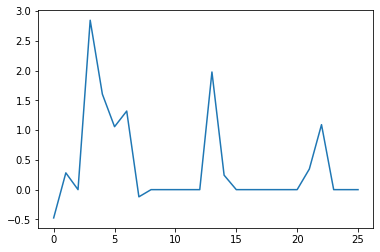

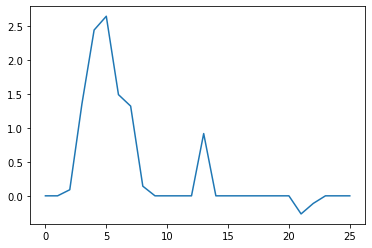

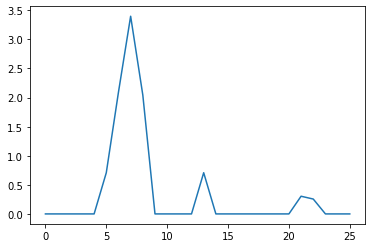

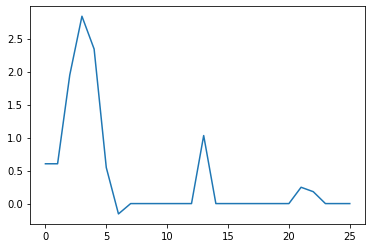

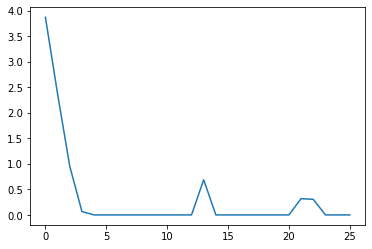

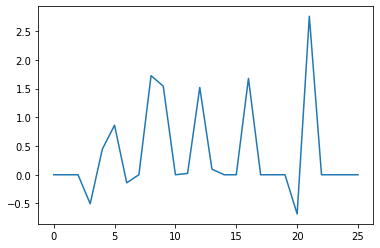

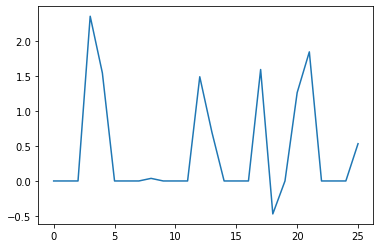

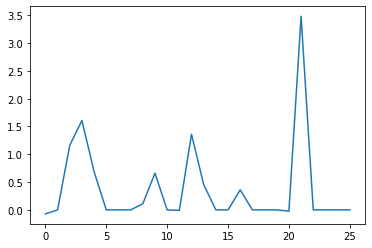

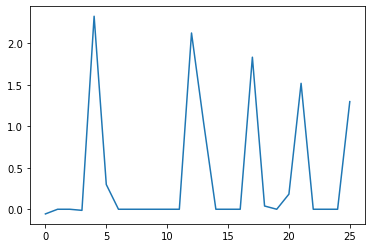

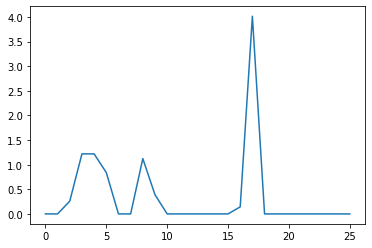

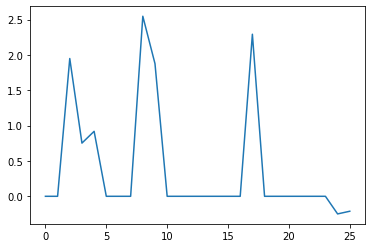

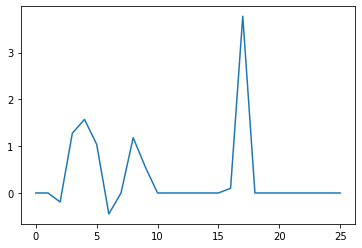

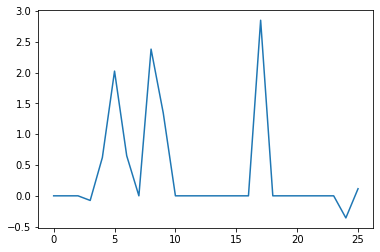

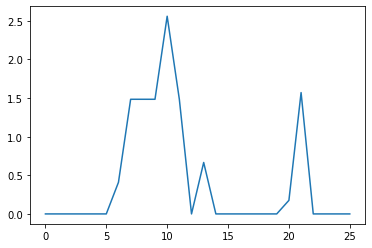

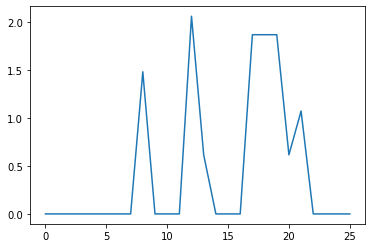

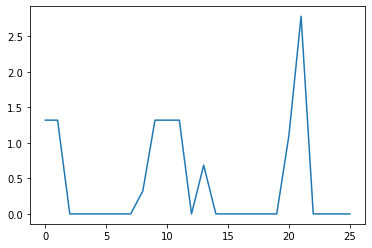

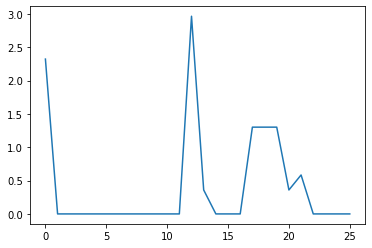

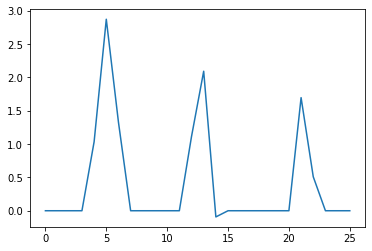

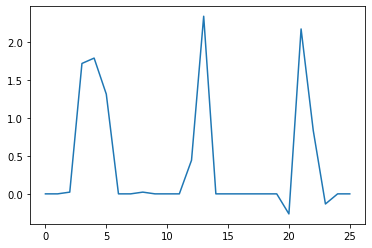

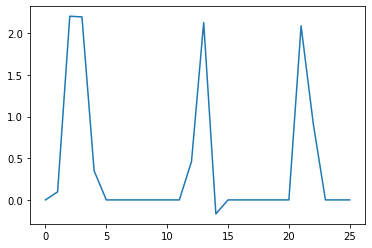

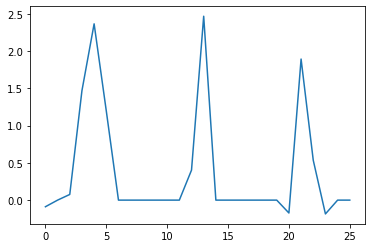

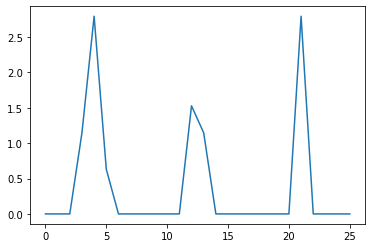

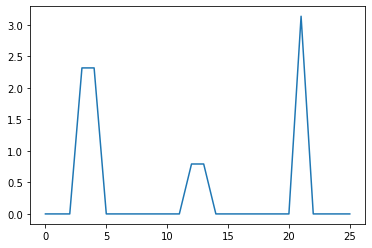

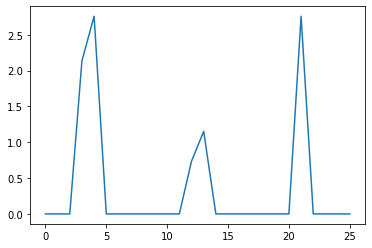

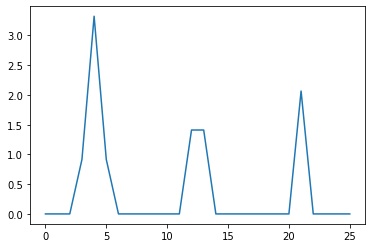

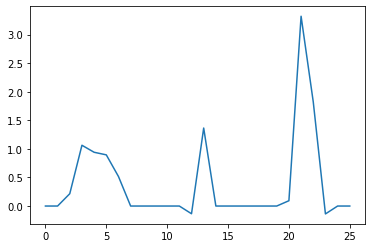

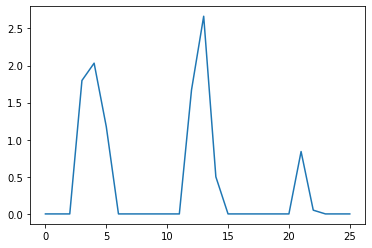

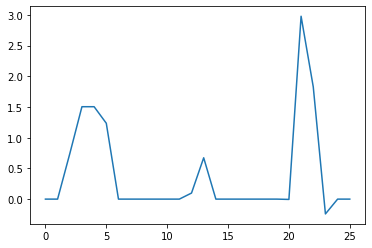

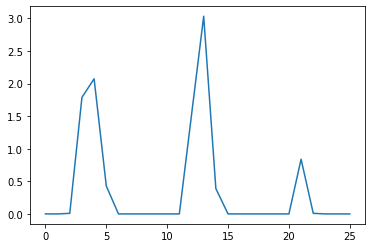

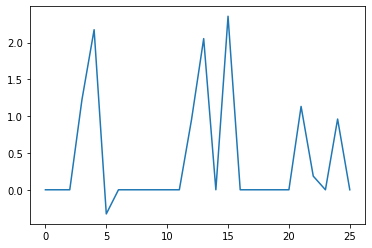

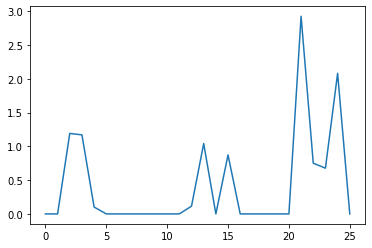

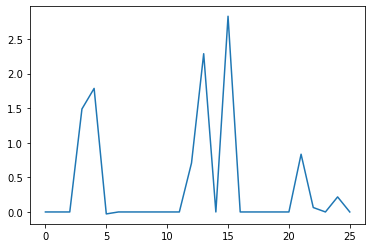

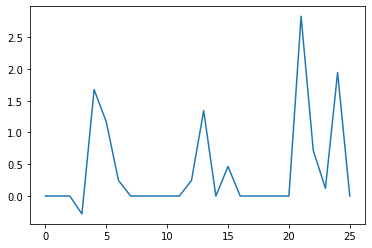

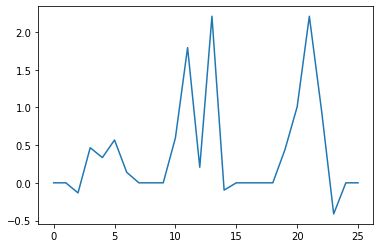

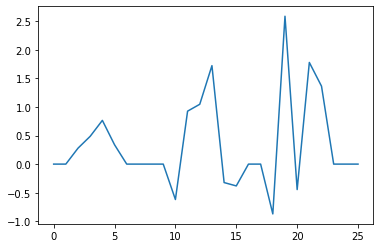

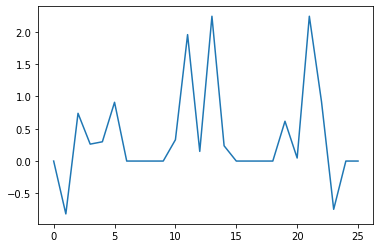

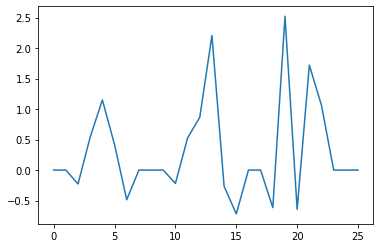

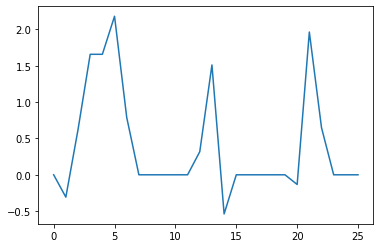

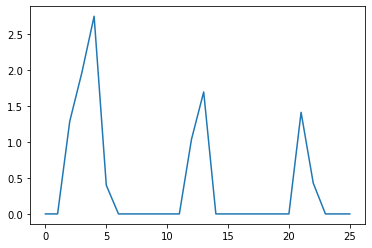

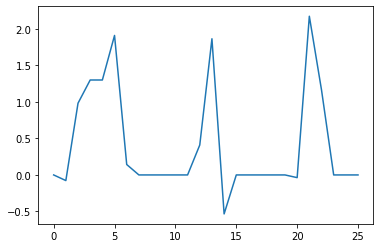

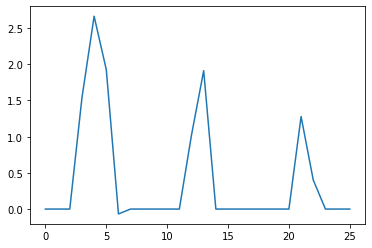

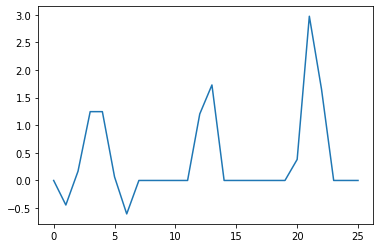

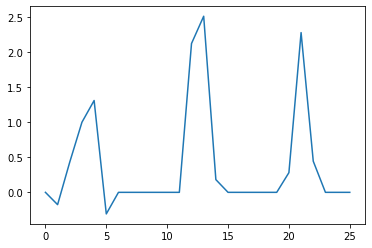

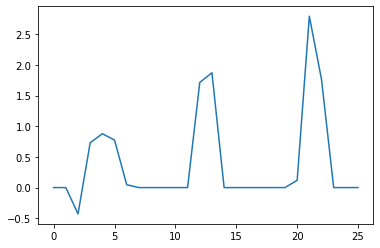

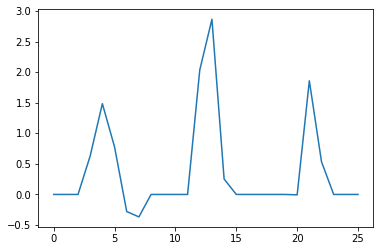

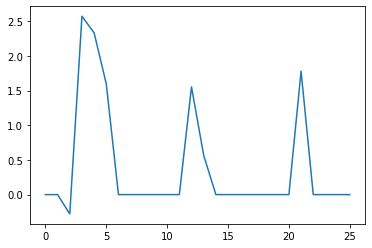

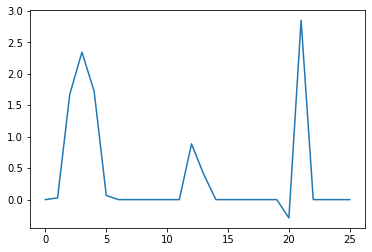

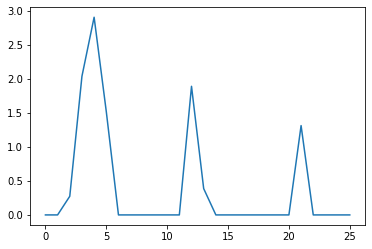

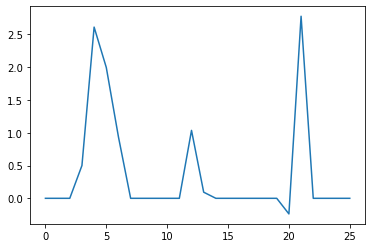

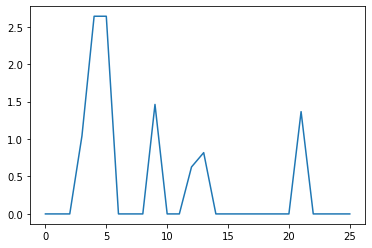

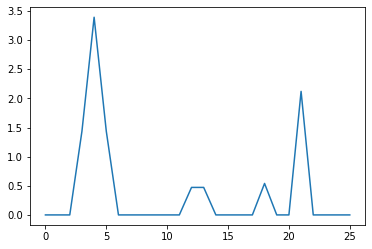

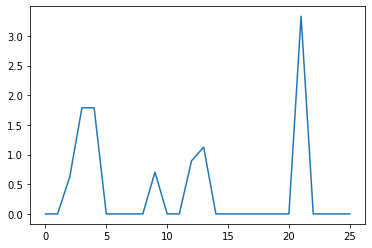

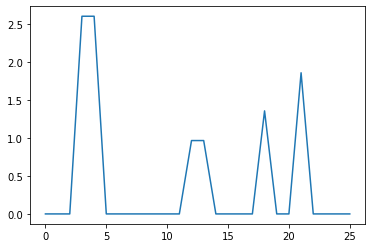

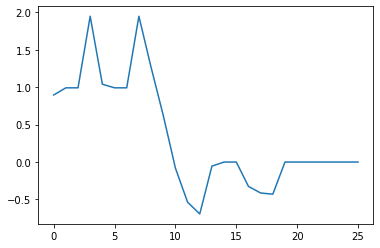

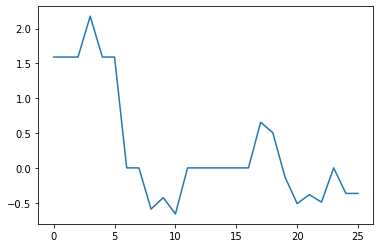

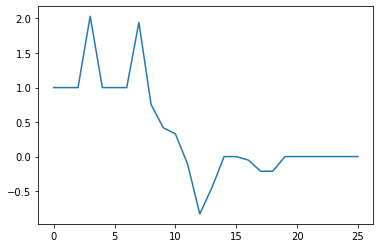

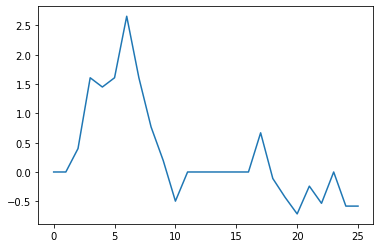

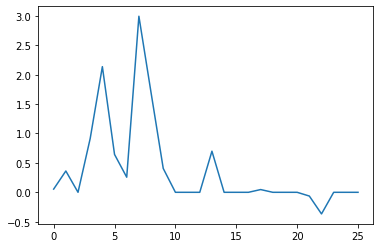

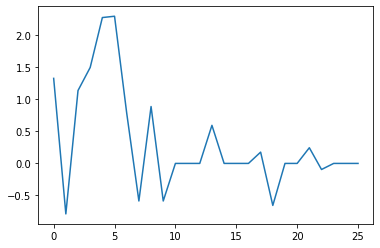

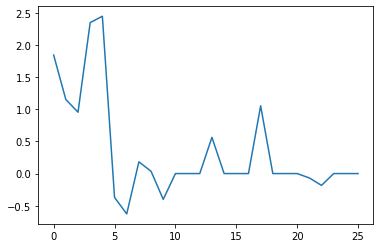

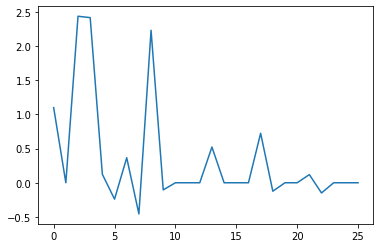

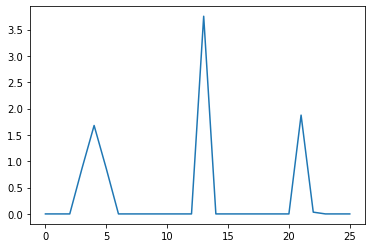

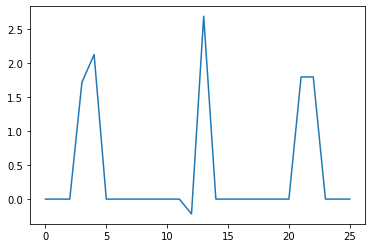

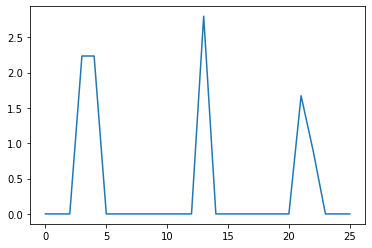

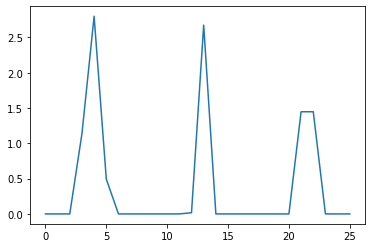

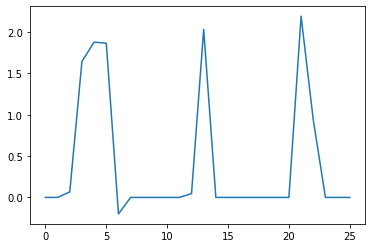

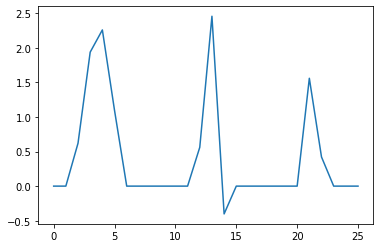

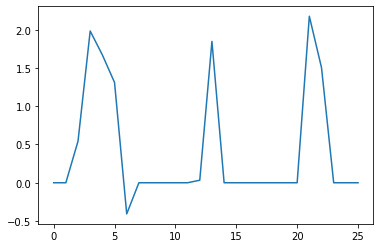

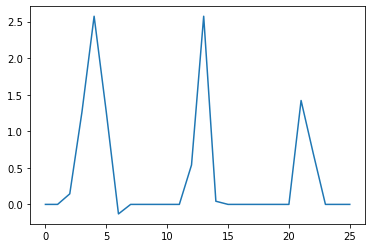

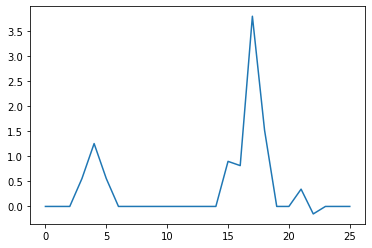

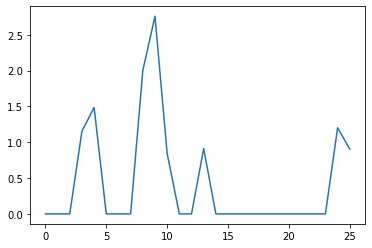

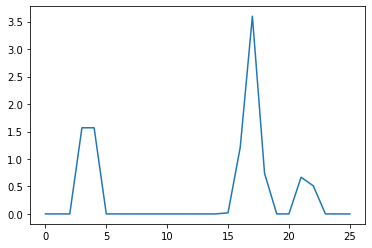

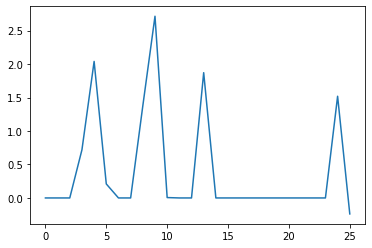

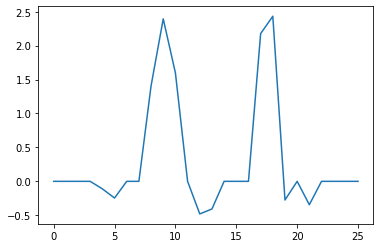

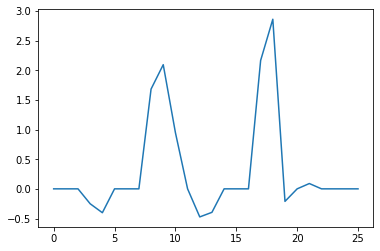

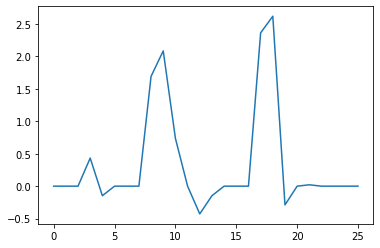

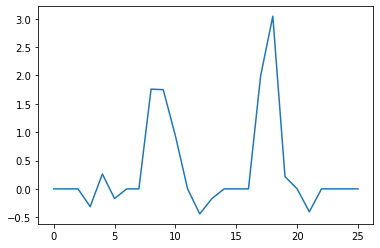

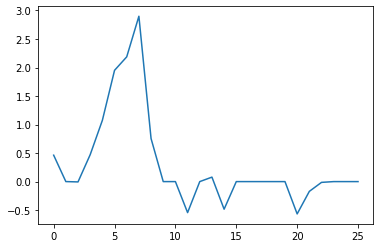

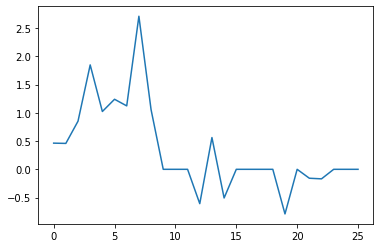

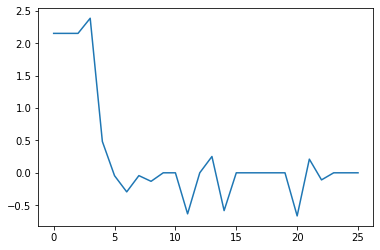

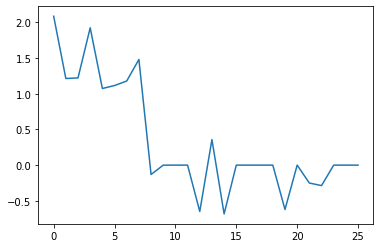

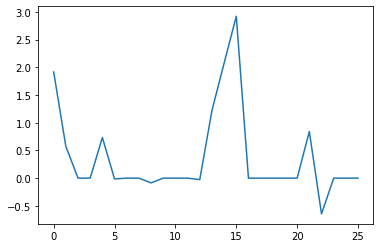

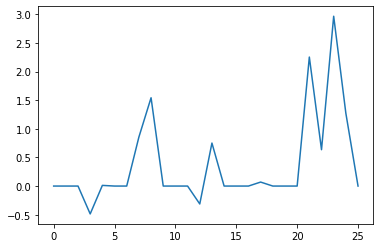

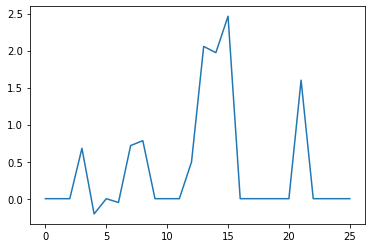

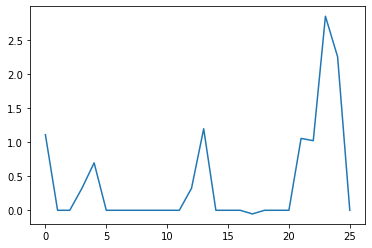

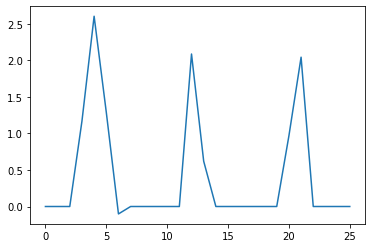

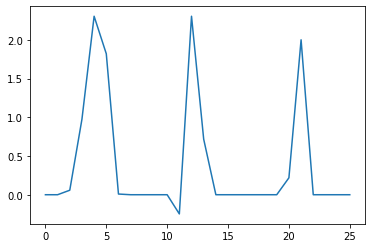

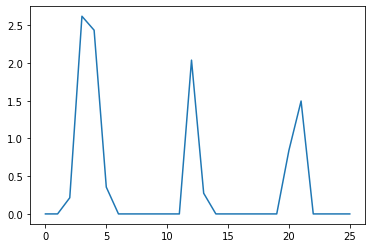

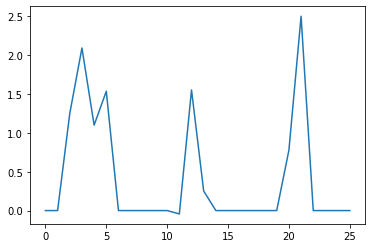

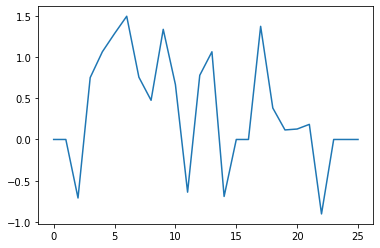

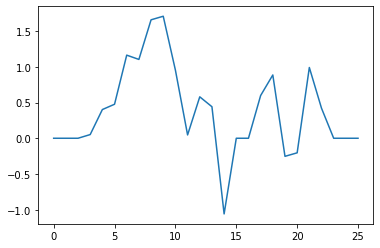

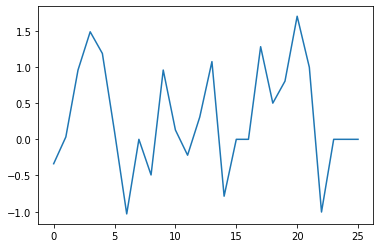

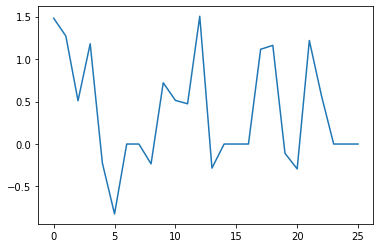

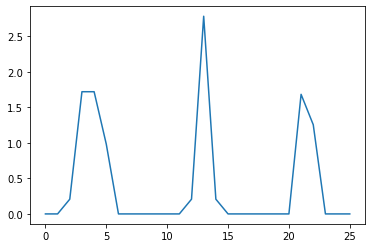

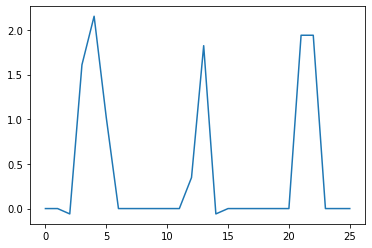

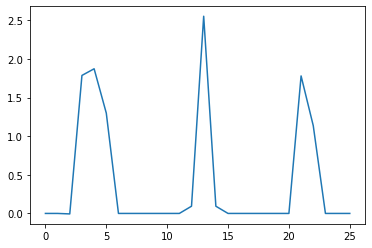

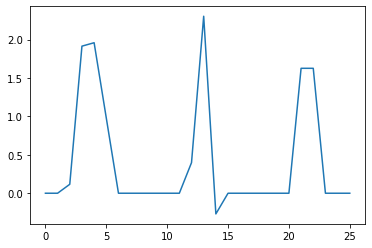

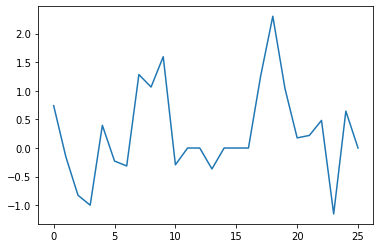

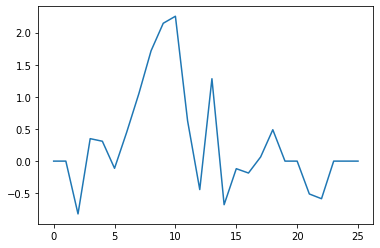

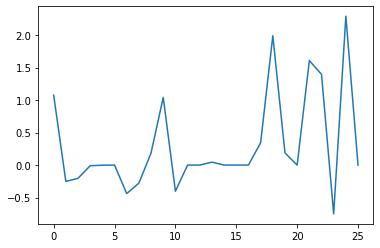

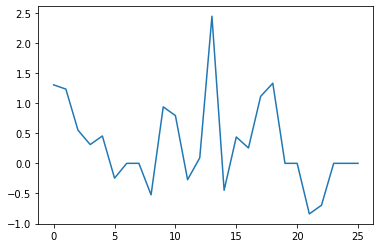

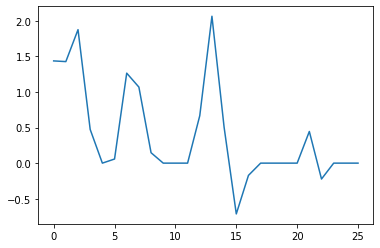

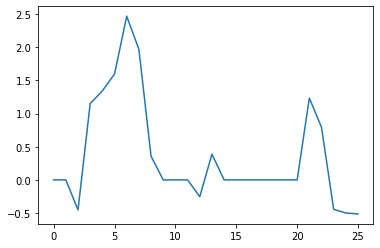

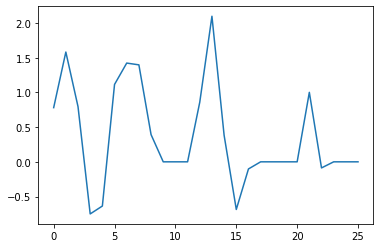

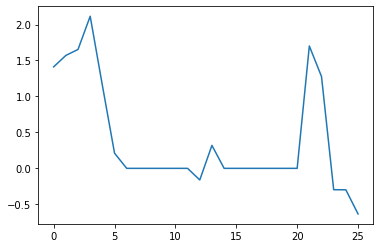

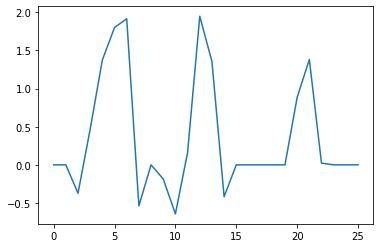

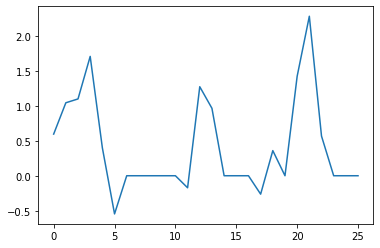

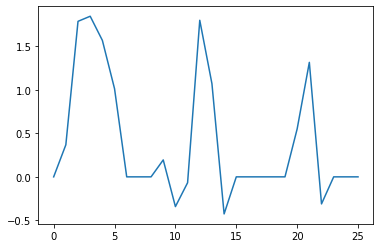

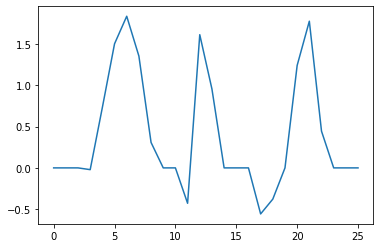

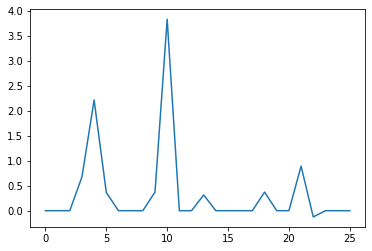

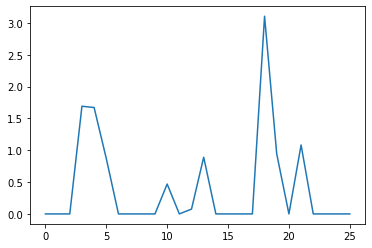

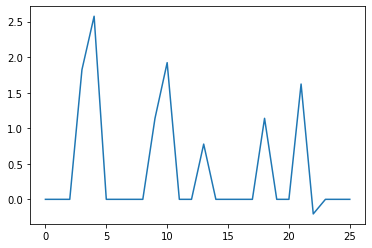

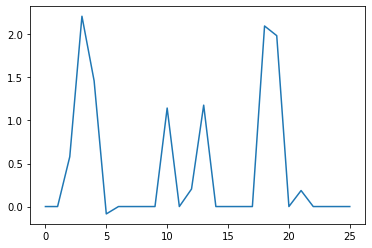

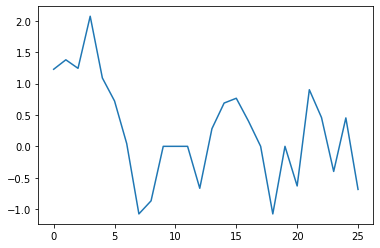

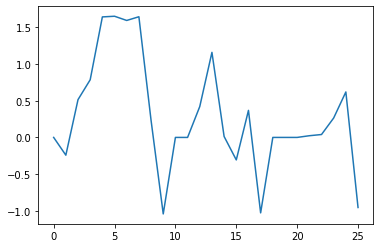

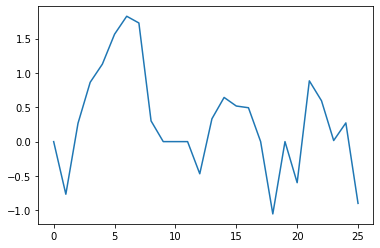

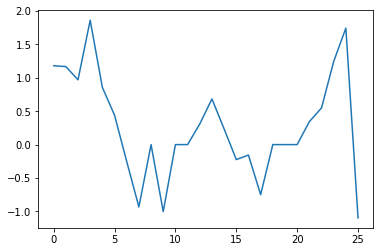

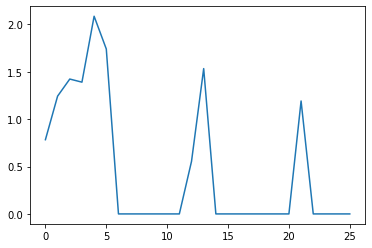

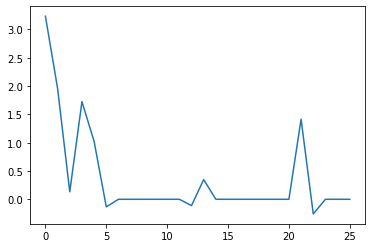

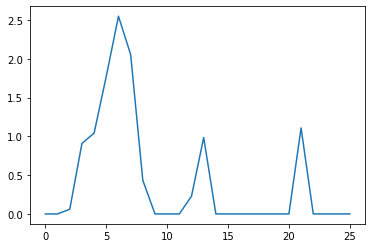

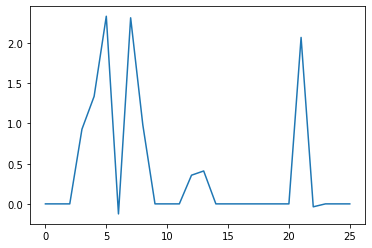

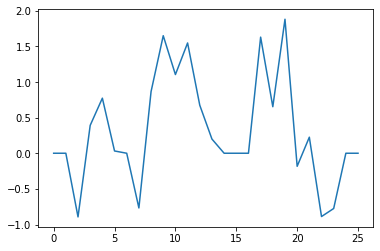

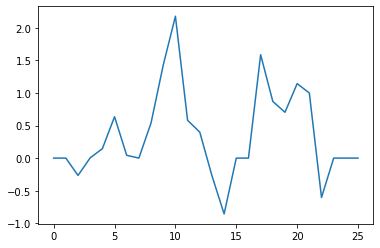

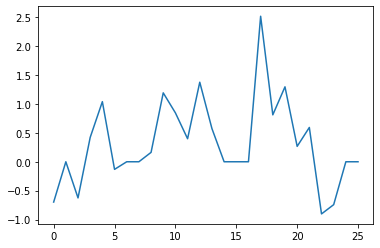

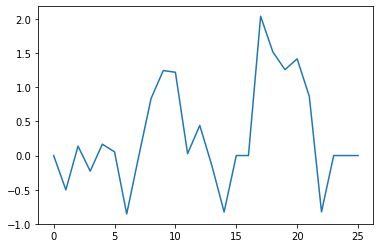

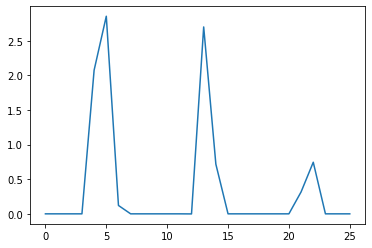

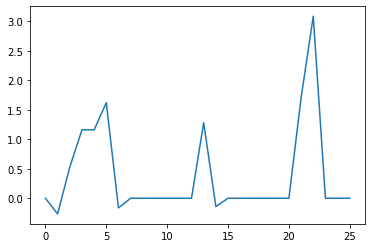

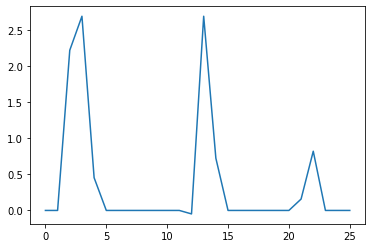

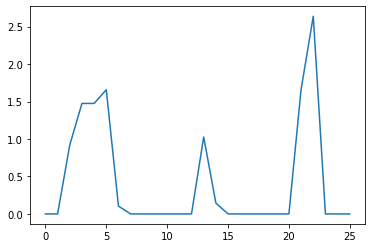

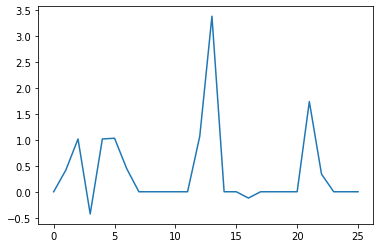

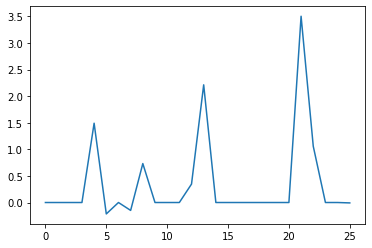

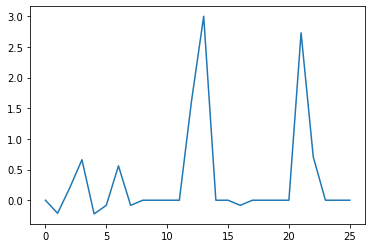

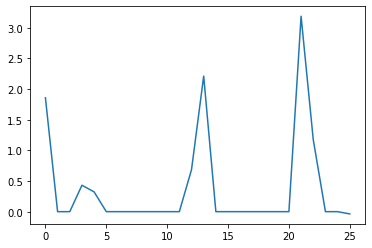

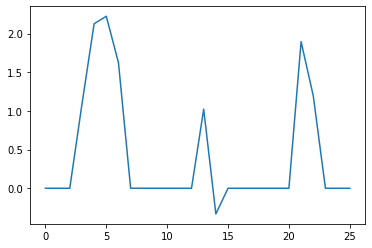

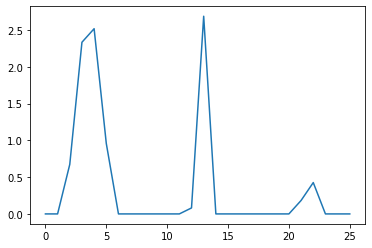

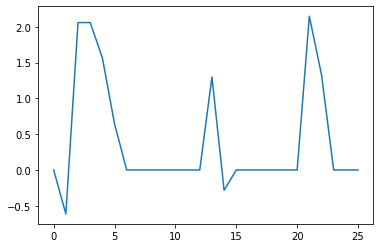

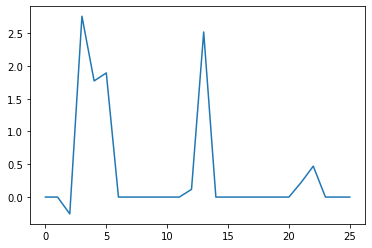

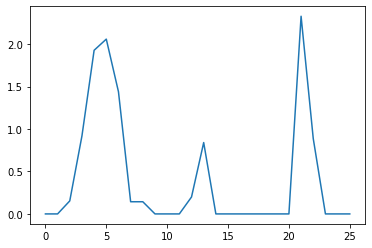

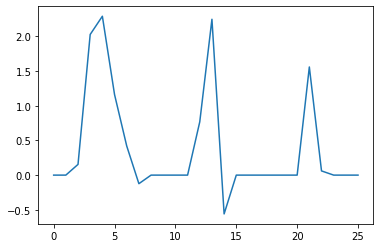

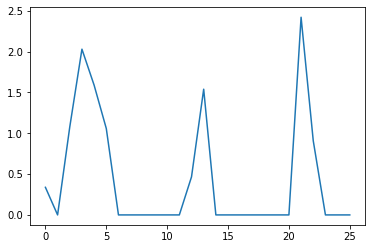

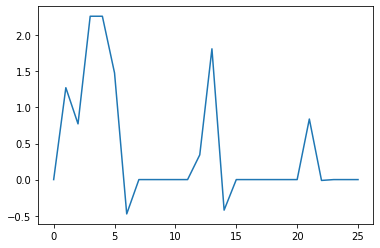

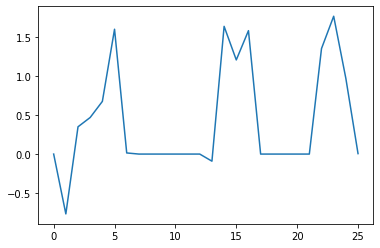

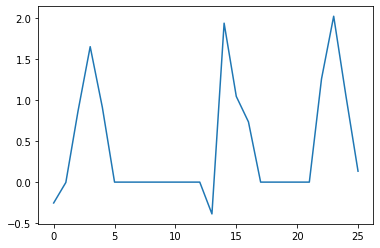

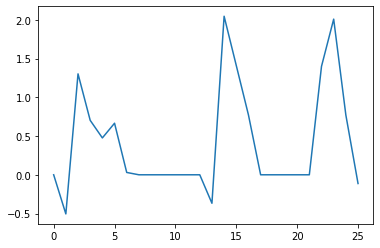

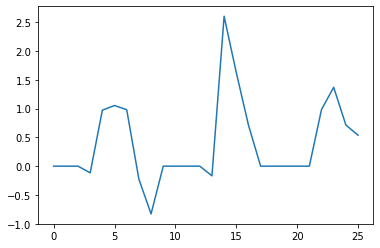

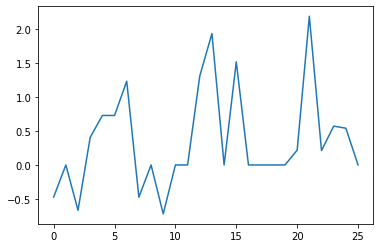

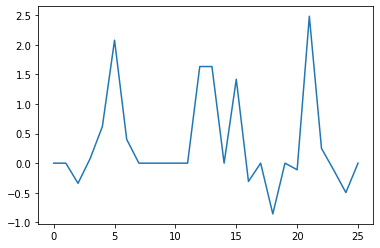

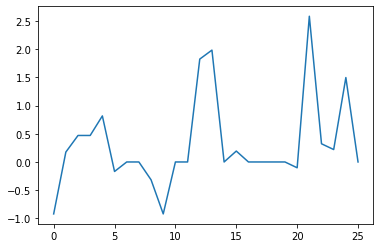

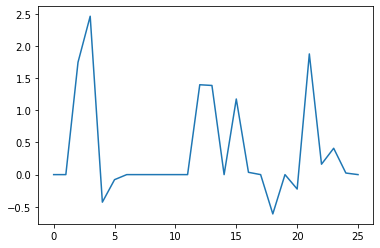

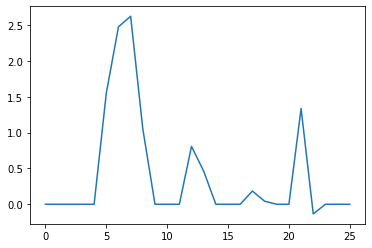

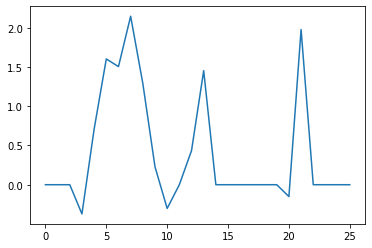

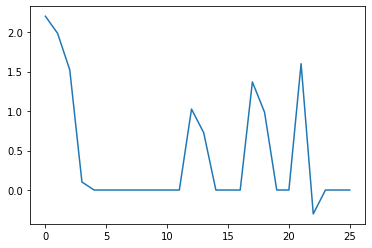

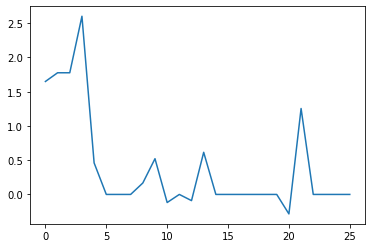

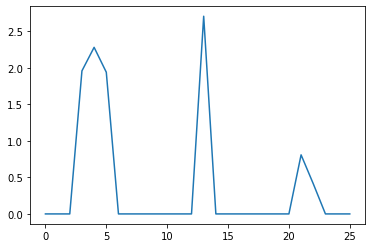

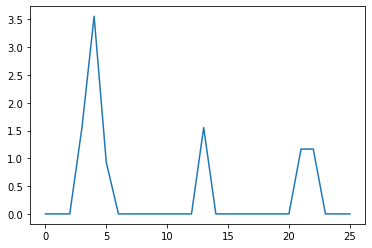

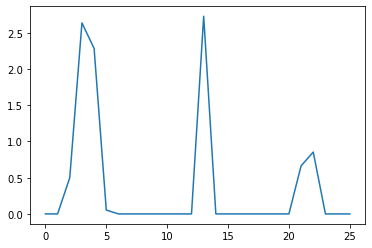

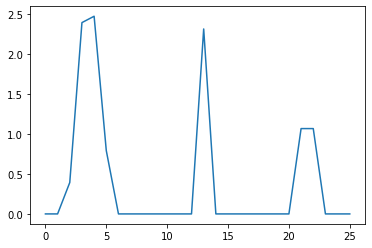

In [15]:
ar = convert_output_to_ar(ts_ar)
for i in range(len(ts_ar)):
    plt.plot(convert_to_std_ts(ar[i], 510.0, 20))
    plt.show()

## Saving both the time series out put and the lsm output

In [9]:
np.save("new_lstm_blood_vessel_output.npy",convert_output_to_ar(ts_ar))

In [10]:
np.save("new_lstm_blood_vessel_ts.npy",np.array([convert_to_std_ts(x, 510.0, 20) for x in convert_output_to_ar(ts_ar)]))